In [2]:
#import libraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder

# Dataset 1

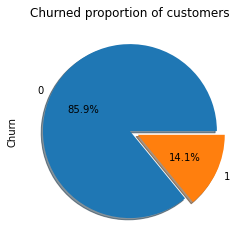

In [3]:
#import and preprocess data
raw_data_path =os.path.join(os.path.pardir,'data','raw', 'Dataset1')
train_file_path = os.path.join(raw_data_path,'train.csv')

df = pd.read_csv(train_file_path)

df["Churn"] = np.where(df.churn== "yes", 1 ,0)
df["international_plan"] = np.where(df.international_plan== "yes", 1 ,0)
df["voice_mail_plan"] = np.where(df.voice_mail_plan== "yes", 1 ,0)
df = df.drop(columns=['churn', 'state'],axis = 'columns')
df = pd.get_dummies(df, columns=['area_code'])
labels=df['Churn']
x = df.drop(columns=['Churn'],axis = 'columns')
y=np.ravel(labels)


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state =42)
oversample = SMOTENC(categorical_features=[1,2,17,18,19])
x_train, y_train = oversample.fit_resample(x_train, y_train)
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Write data
proccessed_data_path =os.path.join(os.path.pardir,'data','processed')
x_train_path = os.path.join(proccessed_data_path,'1-train-x.csv')
x_test_path = os.path.join(proccessed_data_path,'1-test-x.csv')
y_train_path = os.path.join(proccessed_data_path,'1-train-y.csv')
y_test_path = os.path.join(proccessed_data_path,'1-test-y.csv')
x_path = os.path.join(proccessed_data_path,'1-x.csv')
y_path = os.path.join(proccessed_data_path,'1-y.csv')

pd.DataFrame(x).to_csv(x_path)
pd.DataFrame(y).to_csv(y_path)
pd.DataFrame(x_train).to_csv(x_train_path)
pd.DataFrame(x_test).to_csv(x_test_path)
pd.DataFrame(y_train).to_csv(y_train_path)
pd.DataFrame(y_test).to_csv(y_test_path)

df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);

# Dataset 2

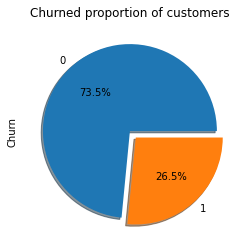

In [4]:
#Read data
raw_data_path =os.path.join(os.path.pardir,'data','raw', 'Dataset2')
train_file_path = os.path.join(raw_data_path,'data.csv')
df = pd.read_csv(train_file_path)
df["Churn"] = np.where(df.Churn== "Yes", 1 ,0)
df["Partner"] = np.where(df.Partner== "Yes", 1 ,0)
df["PaperlessBilling"] = np.where(df.PaperlessBilling== "Yes", 1 ,0)
df["IsMale"] = np.where(df.gender== "Male", 1 ,0)
df["Dependents"] = np.where(df.Dependents== "Yes", 1 ,0)
df["OnlineSecurity"] = np.where(df.OnlineSecurity== "Yes", 1 ,0)
df["OnlineBackup"] = np.where(df.OnlineBackup== "Yes", 1 ,0)
df["DeviceProtection"] = np.where(df.DeviceProtection== "Yes", 1 ,0)
df["TechSupport"] = np.where(df.TechSupport== "Yes", 1 ,0)
df["StreamingMovies"] = np.where(df.StreamingMovies== "Yes", 1 ,0)
df["StreamingTV"] = np.where(df.StreamingTV== "Yes", 1 ,0)
df["PhoneService"] = np.where(df.PhoneService == "Yes", 1 ,0)
ord_enc = OrdinalEncoder()
df["InternetService"] = ord_enc.fit_transform(df[["InternetService"]])
df["MultipleLines"] = ord_enc.fit_transform(df[["MultipleLines"]])
df["Contract"] = ord_enc.fit_transform(df[["Contract"]])
df["PaymentMethod"] = ord_enc.fit_transform(df[["PaymentMethod"]])
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].str.replace(' ', '0'))
df =df.drop(['gender','customerID'], axis=1)
y=np.ravel(labels)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =42)
oversample = SMOTENC(categorical_features=[1,2,17,18,19])
x_train, y_train = oversample.fit_resample(x_train, y_train)
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
            
#Write data
proccessed_data_path =os.path.join(os.path.pardir,'data','processed')
x_train_path = os.path.join(proccessed_data_path,'2-train-x.csv')
x_test_path = os.path.join(proccessed_data_path,'2-test-x.csv')
y_train_path = os.path.join(proccessed_data_path,'2-train-y.csv')
y_test_path = os.path.join(proccessed_data_path,'2-test-y.csv')
x_path = os.path.join(proccessed_data_path,'2-x.csv')
y_path = os.path.join(proccessed_data_path,'2-y.csv')

pd.DataFrame(x).to_csv(x_path)
pd.DataFrame(y).to_csv(y_path)
pd.DataFrame(x_train).to_csv(x_train_path)
pd.DataFrame(x_test).to_csv(x_test_path)
pd.DataFrame(y_train).to_csv(y_train_path)
pd.DataFrame(y_test).to_csv(y_test_path)

df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);


# Dataset 3

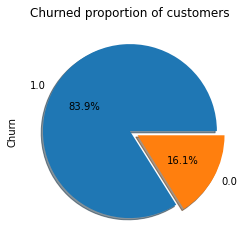

In [5]:
#Read data
raw_data_path =os.path.join(os.path.pardir,'data','raw', 'Dataset3')
train_file_path = os.path.join(raw_data_path,'data.csv')
df = pd.read_csv(train_file_path)
df["IsMale"] = np.where(df.Gender== "M", 1 ,0)

df =df.drop(['Gender','CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
ord_enc = OrdinalEncoder()

df["Attrition_Flag"] = ord_enc.fit_transform(df[["Attrition_Flag"]])
df["Education_Level"] = ord_enc.fit_transform(df[["Education_Level"]])
df["Card_Category"] = ord_enc.fit_transform(df[["Card_Category"]])
df["Income_Category"] = ord_enc.fit_transform(df[["Income_Category"]])
df["Marital_Status"] = ord_enc.fit_transform(df[["Marital_Status"]])

df = df.rename(columns={'Attrition_Flag': 'Churn', })
y=np.ravel(labels)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =42)
oversample = SMOTENC(categorical_features=[1,2,17,18,19])
x_train, y_train = oversample.fit_resample(x_train, y_train)
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Write data
proccessed_data_path =os.path.join(os.path.pardir,'data','processed')
x_train_path = os.path.join(proccessed_data_path,'3-train-x.csv')
x_test_path = os.path.join(proccessed_data_path,'3-test-x.csv')
y_train_path = os.path.join(proccessed_data_path,'3-train-y.csv')
y_test_path = os.path.join(proccessed_data_path,'3-test-y.csv')
x_path = os.path.join(proccessed_data_path,'3-x.csv')
y_path = os.path.join(proccessed_data_path,'3-y.csv')

pd.DataFrame(x).to_csv(x_path)
pd.DataFrame(y).to_csv(y_path)
pd.DataFrame(x_train).to_csv(x_train_path)
pd.DataFrame(x_test).to_csv(x_test_path)
pd.DataFrame(y_train).to_csv(y_train_path)
pd.DataFrame(y_test).to_csv(y_test_path)

df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);


# Dataset 4

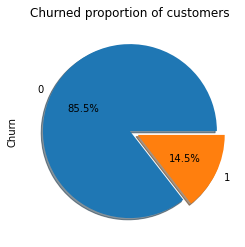

In [6]:
#Read data
raw_data_path =os.path.join(os.path.pardir,'data','raw', 'Dataset4')
train_file_path = os.path.join(raw_data_path,'telecom_churn.csv')
df = pd.read_csv(train_file_path)
y=np.ravel(labels)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =42)
oversample = SMOTENC(categorical_features=[1,2,17,18,19])
x_train, y_train = oversample.fit_resample(x_train, y_train)
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Write data
proccessed_data_path =os.path.join(os.path.pardir,'data','processed')
x_train_path = os.path.join(proccessed_data_path,'4-train-x.csv')
x_test_path = os.path.join(proccessed_data_path,'4-test-x.csv')
y_train_path = os.path.join(proccessed_data_path,'4-train-y.csv')
y_test_path = os.path.join(proccessed_data_path,'4-test-y.csv')
x_path = os.path.join(proccessed_data_path,'4-x.csv')
y_path = os.path.join(proccessed_data_path,'4-y.csv')

pd.DataFrame(x).to_csv(x_path)
pd.DataFrame(y).to_csv(y_path)
pd.DataFrame(x_train).to_csv(x_train_path)
pd.DataFrame(x_test).to_csv(x_test_path)
pd.DataFrame(y_train).to_csv(y_train_path)
pd.DataFrame(y_test).to_csv(y_test_path)
df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);

# Dataset 5

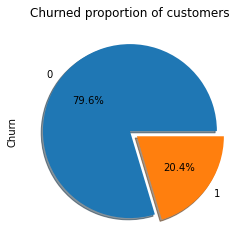

In [7]:
#Read data
raw_data_path =os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path,'Dataset5','Churn Modeling.csv')
df = pd.read_csv(train_file_path)

df["IsMale"] = np.where(df.Gender== "Male", 1 ,0)
df =df.drop(['RowNumber','CustomerId','Surname','Gender','Geography'], axis=1)
df = df.rename(columns={'Exited': 'Churn', })
y=np.ravel(labels)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =42)
oversample = SMOTENC(categorical_features=[1,2,17,18,19])
x_train, y_train = oversample.fit_resample(x_train, y_train)
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#Write data
proccessed_data_path =os.path.join(os.path.pardir,'data','processed')
x_train_path = os.path.join(proccessed_data_path,'5-train-x.csv')
x_test_path = os.path.join(proccessed_data_path,'5-test-x.csv')
y_train_path = os.path.join(proccessed_data_path,'5-train-y.csv')
y_test_path = os.path.join(proccessed_data_path,'5-test-y.csv')
x_path = os.path.join(proccessed_data_path,'5-x.csv')
y_path = os.path.join(proccessed_data_path,'5-y.csv')

pd.DataFrame(x).to_csv(x_path)
pd.DataFrame(y).to_csv(y_path)
pd.DataFrame(x_train).to_csv(x_train_path)
pd.DataFrame(x_test).to_csv(x_test_path)
pd.DataFrame(y_train).to_csv(y_train_path)
pd.DataFrame(y_test).to_csv(y_test_path)

df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);

# Dataset 6

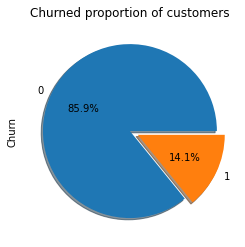

In [8]:
#Read data
raw_data_path =os.path.join(os.path.pardir,'data','raw', 'Dataset6')
train_file_path = os.path.join(raw_data_path,'data.csv')
df = pd.read_csv(train_file_path)

df["churn"] = np.where(df.churn== "Yes", 1 ,0)
df["internationalplan"] = np.where(df.internationalplan== "yes", 1 ,0)
df["voicemailplan"] = np.where(df.voicemailplan== "yes", 1 ,0)
df = df.rename(columns={'churn': 'Churn' })
y=np.ravel(labels)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =42)
oversample = SMOTENC(categorical_features=[1,2,17,18,19])
x_train, y_train = oversample.fit_resample(x_train, y_train)
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Write data
proccessed_data_path =os.path.join(os.path.pardir,'data','processed')
x_train_path = os.path.join(proccessed_data_path,'6-train-x.csv')
x_test_path = os.path.join(proccessed_data_path,'6-test-x.csv')
y_train_path = os.path.join(proccessed_data_path,'6-train-y.csv')
y_test_path = os.path.join(proccessed_data_path,'6-test-y.csv')
x_path = os.path.join(proccessed_data_path,'6-x.csv')
y_path = os.path.join(proccessed_data_path,'6-y.csv')

pd.DataFrame(x).to_csv(x_path)
pd.DataFrame(y).to_csv(y_path)
pd.DataFrame(x_train).to_csv(x_train_path)
pd.DataFrame(x_test).to_csv(x_test_path)
pd.DataFrame(y_train).to_csv(y_train_path)
pd.DataFrame(y_test).to_csv(y_test_path)

df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);

# Dataset 7

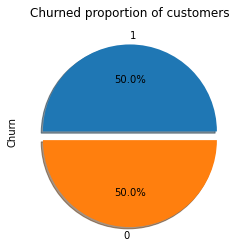

In [9]:
#Read data
raw_data_path =os.path.join(os.path.pardir,'data','raw', 'Dataset7')

train_file_path = os.path.join(raw_data_path,'data.csv')
df = pd.read_csv(train_file_path)
df["Churn"] = np.where(df.Class== "Churned", 1 ,0)

ord_enc = OrdinalEncoder()
df["aug_user_type"] = np.where(df.aug_user_type.isnull(), 'Other' ,df.aug_user_type)
df["sep_user_type"] = np.where(df.sep_user_type.isnull(), 'Other' ,df.aug_user_type)
df["aug_fav_a"] = np.where(df.sep_user_type.isnull(), '0' ,df.aug_user_type)
df["sep_fav_a"] = np.where(df.sep_fav_a.isnull(), 'Other' ,df.aug_user_type)

df["aug_user_type"] = ord_enc.fit_transform(df[["aug_user_type"]])
df["sep_user_type"] = ord_enc.fit_transform(df[["sep_user_type"]])
df["aug_fav_a"] = ord_enc.fit_transform(df[["aug_fav_a"]])
df["sep_fav_a"] = ord_enc.fit_transform(df[["sep_fav_a"]])

df =df.drop(['Class'], axis=1)
y=np.ravel(labels)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =42)
oversample = SMOTENC(categorical_features=[1,2,17,18,19])
x_train, y_train = oversample.fit_resample(x_train, y_train)
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Write data
proccessed_data_path =os.path.join(os.path.pardir,'data','processed')
x_train_path = os.path.join(proccessed_data_path,'7-train-x.csv')
x_test_path = os.path.join(proccessed_data_path,'7-test-x.csv')
y_train_path = os.path.join(proccessed_data_path,'7-train-y.csv')
y_test_path = os.path.join(proccessed_data_path,'7-test-y.csv')
x_path = os.path.join(proccessed_data_path,'7-x.csv')
y_path = os.path.join(proccessed_data_path,'7-y.csv')

pd.DataFrame(x).to_csv(x_path)
pd.DataFrame(y).to_csv(y_path)
pd.DataFrame(x_train).to_csv(x_train_path)
pd.DataFrame(x_test).to_csv(x_test_path)
pd.DataFrame(y_train).to_csv(y_train_path)
pd.DataFrame(y_test).to_csv(y_test_path)

df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);

# Dataset 8

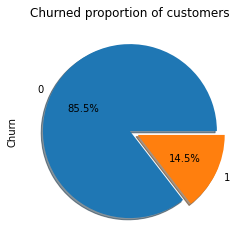

In [10]:
#Read data
raw_data_path =os.path.join(os.path.pardir,'data','raw', 'Dataset8')
train_file_path = os.path.join(raw_data_path,'data.csv')
df = pd.read_csv(train_file_path)

df["Churn"] = np.where(df['Churn?']== "True.", 1 ,0)
df["VMail Plan"] = np.where(df['VMail Plan']== "yes", 1 ,0)
df["Int'l Plan"] = np.where(df["Int'l Plan"]== "yes", 1 ,0)
df = pd.get_dummies(df, columns=['Area Code'])

df =df.drop(['Churn?','Phone','State'], axis=1)
y=np.ravel(labels)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =42)
oversample = SMOTENC(categorical_features=[1,2,17,18,19])
x_train, y_train = oversample.fit_resample(x_train, y_train)
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Write data
proccessed_data_path =os.path.join(os.path.pardir,'data','processed')
x_train_path = os.path.join(proccessed_data_path,'8-train-x.csv')
x_test_path = os.path.join(proccessed_data_path,'8-test-x.csv')
y_train_path = os.path.join(proccessed_data_path,'8-train-y.csv')
y_test_path = os.path.join(proccessed_data_path,'8-test-y.csv')
x_path = os.path.join(proccessed_data_path,'8-x.csv')
y_path = os.path.join(proccessed_data_path,'8-y.csv')

pd.DataFrame(x).to_csv(x_path)
pd.DataFrame(y).to_csv(y_path)
pd.DataFrame(x_train).to_csv(x_train_path)
pd.DataFrame(x_test).to_csv(x_test_path)
pd.DataFrame(y_train).to_csv(y_train_path)
pd.DataFrame(y_test).to_csv(y_test_path)
df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);

# Dataset 9

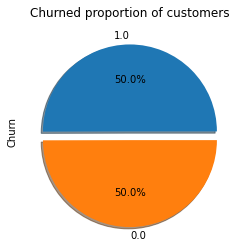

In [11]:
#Read data
raw_data_path =os.path.join(os.path.pardir,'data','raw', 'Dataset9')
train_file_path = os.path.join(raw_data_path,'data.csv')
df = pd.read_csv(train_file_path)

df = df.drop([df.index[1400], df.index[303]])

df["Churn"] = df["Churn Status"]
df["Network type subscription in Month 2"] = np.where(df["Network type subscription in Month 2"].isnull(), 'Other' ,df["Network type subscription in Month 2"])
df["Network type subscription in Month 1"] = np.where(df["Network type subscription in Month 1"].isnull(), 'Other' ,df["Network type subscription in Month 1"])
df["Most Loved Competitor network in in Month 1"] = np.where(df["Most Loved Competitor network in in Month 1"].isnull(), '0' ,df["Most Loved Competitor network in in Month 1"])
ord_enc = OrdinalEncoder()
df["Network type subscription in Month 1"] = ord_enc.fit_transform(df[["Network type subscription in Month 1"]])
df["Network type subscription in Month 2"] = ord_enc.fit_transform(df[["Network type subscription in Month 2"]])
df["Most Loved Competitor network in in Month 1"] = ord_enc.fit_transform(df[["Most Loved Competitor network in in Month 1"]])
df["Most Loved Competitor network in in Month 2"] = ord_enc.fit_transform(df[["Most Loved Competitor network in in Month 2"]])

df =df.drop(['Churn Status', 'Customer ID'], axis=1)
y=np.ravel(labels)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =42)
oversample = SMOTENC(categorical_features=[1,2,17,18,19])
x_train, y_train = oversample.fit_resample(x_train, y_train)
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Write data
proccessed_data_path =os.path.join(os.path.pardir,'data','processed')
x_train_path = os.path.join(proccessed_data_path,'9-train-x.csv')
x_test_path = os.path.join(proccessed_data_path,'9-test-x.csv')
y_train_path = os.path.join(proccessed_data_path,'9-train-y.csv')
y_test_path = os.path.join(proccessed_data_path,'9-test-y.csv')
x_path = os.path.join(proccessed_data_path,'9-x.csv')
y_path = os.path.join(proccessed_data_path,'9-y.csv')

pd.DataFrame(x).to_csv(x_path)
pd.DataFrame(y).to_csv(y_path)
pd.DataFrame(x_train).to_csv(x_train_path)
pd.DataFrame(x_test).to_csv(x_test_path)
pd.DataFrame(y_train).to_csv(y_train_path)
pd.DataFrame(y_test).to_csv(y_test_path)
df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);

# Dataset 10

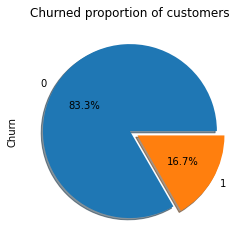

In [12]:
#Read data
raw_data_path =os.path.join(os.path.pardir,'data','raw', 'Dataset10')
train_file_path = os.path.join(raw_data_path,'data.csv')
df = pd.read_csv(train_file_path)
df =df.drop(['Names','Company','Location','Onboard_date'], axis=1)
y=np.ravel(labels)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =42)
oversample = SMOTENC(categorical_features=[1,2,17,18,19])
x_train, y_train = oversample.fit_resample(x_train, y_train)
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Write data
proccessed_data_path =os.path.join(os.path.pardir,'data','processed')
x_train_path = os.path.join(proccessed_data_path,'10-train-x.csv')
x_test_path = os.path.join(proccessed_data_path,'10-test-x.csv')
y_train_path = os.path.join(proccessed_data_path,'10-train-y.csv')
y_test_path = os.path.join(proccessed_data_path,'10-test-y.csv')
x_path = os.path.join(proccessed_data_path,'10-x.csv')
y_path = os.path.join(proccessed_data_path,'10-y.csv')

pd.DataFrame(x).to_csv(x_path)
pd.DataFrame(y).to_csv(y_path)
pd.DataFrame(x_train).to_csv(x_train_path)
pd.DataFrame(x_test).to_csv(x_test_path)
pd.DataFrame(y_train).to_csv(y_train_path)
pd.DataFrame(y_test).to_csv(y_test_path)
df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);